Data: 8/10 - Autor: Eduardo Oliveira

## **Geração e Carregamento dos Dados Simulados**

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Definir o número de pacientes
num_pacientes = 500

# Gerar dados sintéticos
np.random.seed(42)

# Idade: valores entre 18 e 80 anos
idades = np.random.randint(18, 81, num_pacientes)

# IMC: valores entre 18 e 40 (gordo, normal, baixo peso)
imc = np.random.uniform(18, 40, num_pacientes)

# Pressão Arterial: média de 120/80 mmHg, com uma variação aleatória
pressao_arterial = np.random.randint(100, 180, num_pacientes)  # Sistólica
pressao_arterial_diastolica = np.random.randint(60, 120, num_pacientes)  # Diastólica

# Níveis de glicose: entre 70 e 200 mg/dL
glicose = np.random.uniform(70, 200, num_pacientes)

# Colesterol: entre 150 e 300 mg/dL
colesterol = np.random.uniform(150, 300, num_pacientes)

# Criar o DataFrame
dados = pd.DataFrame({
    'idade': idades,
    'IMC': imc,
    'pressao_arterial': pressao_arterial,
    'pressao_arterial_diastolica': pressao_arterial_diastolica,
    'glicose': glicose,
    'colesterol': colesterol
})

# Exibir as primeiras linhas
print(dados.head())

# Salvar o dataset em um arquivo CSV
dados.to_csv('dados_saude_sinteticos.csv', index=False)


   idade        IMC  pressao_arterial  pressao_arterial_diastolica  \
0     56  36.572689               132                           91   
1     69  38.460370               126                          102   
2     46  19.549155               135                          112   
3     32  22.596212               128                           89   
4     60  32.765157               137                           98   

      glicose  colesterol  
0  112.006985  226.516457  
1  196.502707  258.510715  
2  145.414590  165.620604  
3  103.049195  183.815813  
4  137.824906  255.441516  


In [2]:
import os

# Definir a variável de ambiente antes de importar o KMeans
os.environ["OMP_NUM_THREADS"] = "2"

# Importar kmeans
from sklearn.cluster import KMeans

In [3]:
# Carregar o dataset
data = pd.read_csv('dados_saude_sinteticos.csv')

# Exibir as primeiras linhas do dataset
print(data.head())

# Verificar o resumo estatístico
print(data.describe())

# Verificar valores ausentes
print(data.isnull().sum())


   idade        IMC  pressao_arterial  pressao_arterial_diastolica  \
0     56  36.572689               132                           91   
1     69  38.460370               126                          102   
2     46  19.549155               135                          112   
3     32  22.596212               128                           89   
4     60  32.765157               137                           98   

      glicose  colesterol  
0  112.006985  226.516457  
1  196.502707  258.510715  
2  145.414590  165.620604  
3  103.049195  183.815813  
4  137.824906  255.441516  
            idade         IMC  pressao_arterial  pressao_arterial_diastolica  \
count  500.000000  500.000000        500.000000                   500.000000   
mean    50.336000   28.983284        138.216000                    89.312000   
std     18.510873    6.279585         22.063521                    17.243937   
min     18.000000   18.057091        100.000000                    60.000000   
25%     35.

## **K-Means com PCA** ##

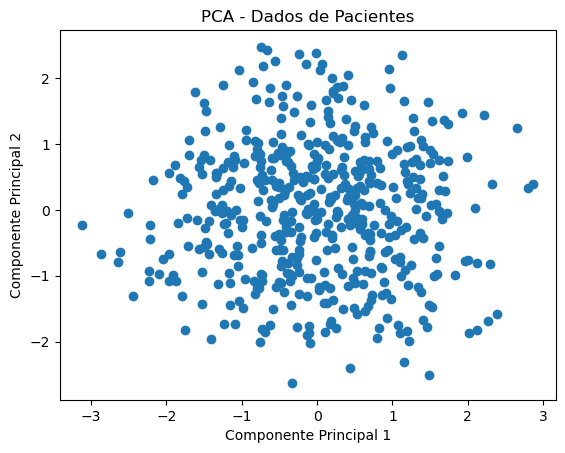

In [4]:
# Selecionar as colunas relevantes
X = data[['idade', 'IMC', 'pressao_arterial', 'glicose', 'colesterol']]

# Normalizar os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar os dados no espaço reduzido (2D)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Dados de Pacientes')
plt.show()


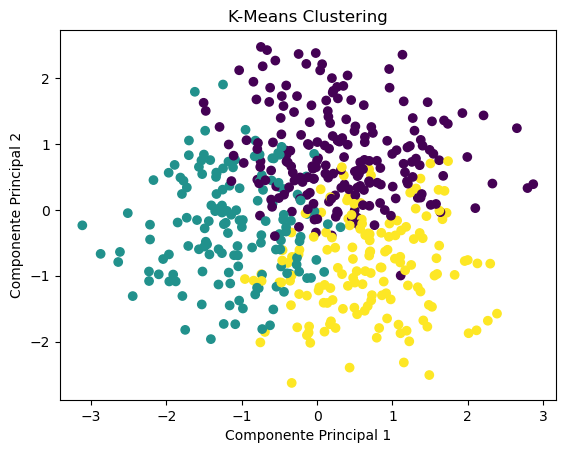

In [5]:
# Aplicar K-Means (escolher o número de clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Adicionar os resultados ao dataframe original
data['cluster_kmeans'] = clusters_kmeans

# Visualizar os clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_kmeans, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('K-Means Clustering')
plt.show()

In [6]:
# Análise estatística dos clusters
print(data.groupby('cluster_kmeans').describe())

# Comparar grupos em relação às variáveis de saúde
for cluster in range(3):  # Se usamos 3 clusters no K-Means
    print(f"\nCluster {cluster}:")
    print(data[data['cluster_kmeans'] == cluster][['idade', 'IMC', 'pressao_arterial', 'glicose', 'colesterol']].mean())


                idade                                                      \
                count       mean        std   min   25%   50%   75%   max   
cluster_kmeans                                                              
0               201.0  51.263682  17.229774  18.0  38.0  52.0  65.0  80.0   
1               149.0  63.234899  14.124155  20.0  54.0  66.0  76.0  80.0   
2               150.0  36.280000  13.582025  18.0  25.0  35.0  45.0  80.0   

                  IMC             ...     glicose             colesterol  \
                count       mean  ...         75%         max      count   
cluster_kmeans                    ...                                      
0               201.0  35.003021  ...  167.006943  199.014002      201.0   
1               149.0  25.502756  ...  150.144964  199.133802      149.0   
2               150.0  24.374160  ...  173.532625  199.412464      150.0   

                                                                           \
   

In [7]:
#Foram identificados três clusters. O primeiro grupo, com pacientes obesos e pressão arterial alta, 
#apresenta alto risco cardiovascular e diabetes. O segundo grupo, composto por pacientes com peso saudável,
#tem risco de pré-diabetes e doenças cardíacas. O terceiro grupo, embora jovem e com peso saudável, 
#sofre de hipertensão grave e apresenta risco de doenças metabólicas. Cada cluster reflete diferentes perfis de 
#risco para doenças cardíacas e diabetes.